In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import regression as reg
from scipy import stats
from matplotlib import pyplot as plt
import pickle
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
from graph_tool import centrality

In [2]:
metrics = pd.read_csv("metrics_volume.csv")

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


In [3]:
metrics

,Unnamed: 0,Symbol,Return,Volatility,Sharpe,Volume,betweenness,coreness,clustering
0,0,AADR,-0.138521,0.244183,-0.567284,1.431660e+04,0.000000,0.000000,1.000000
1,1,AAXJ,-0.113130,0.227159,-0.498020,1.246921e+06,0.001561,0.010447,0.984460
2,2,ACWF,0.181302,0.202850,0.893772,2.369555e+04,0.000173,0.444445,0.921866
3,3,ACWI,0.359218,0.202702,1.772148,3.582106e+06,0.000467,0.488423,0.907496
4,4,ACWV,0.259054,0.151914,1.705264,2.814782e+05,0.000132,0.573296,0.906428
...,...,...,...,...,...,...,...,...,...
694,694,XTN,0.300198,0.284762,1.054210,5.574535e+04,0.000010,0.010615,0.985883
695,695,XYLD,0.023902,0.179123,0.133439,1.281076e+05,0.000514,0.061438,0.931376
696,696,YCS,0.642359,0.160138,4.011278,2.282875e+04,0.000262,0.995726,0.878619
697,697,YLD,0.263801,0.095465,2.763319,3.090715e+04,0.002776,0.044175,0.996104


In [4]:
metrics.describe()

,Unnamed: 0,Return,Volatility,Sharpe,Volume,betweenness,coreness,clustering
count,699.000000,699.000000,699.000000,699.000000,6.990000e+02,699.000000,699.000000,699.000000
mean,349.000000,0.202776,0.195299,1.092052,9.304675e+05,0.000232,0.377222,0.914842
std,201.928205,0.306604,0.120763,1.816391,4.880443e+06,0.000505,0.317300,0.134389
min,0.000000,-0.999503,0.002420,-2.771551,1.162637e+04,0.000000,0.000000,0.000000
25%,174.500000,-0.009162,0.119663,-0.080082,3.003956e+04,0.000026,0.040563,0.895639
50%,349.000000,0.102284,0.207049,0.977557,8.353145e+04,0.000141,0.356151,0.926346
75%,523.500000,0.435059,0.244413,2.081476,4.101246e+05,0.000206,0.672239,0.976432
max,698.000000,1.123867,1.557547,22.467695,8.726091e+07,0.006927,1.000000,1.000000


# Analise de Residuos

### Modelo A

In [5]:
result = reg.linear(data=metrics, formula='Volatility ~ coreness + np.abs(Return)')


result.micro_summary()

variable,coefficient,std error,p-value
coreness,0.000716,0.012403,0.953961
np.abs(Return),0.260432,0.016109,0.000000


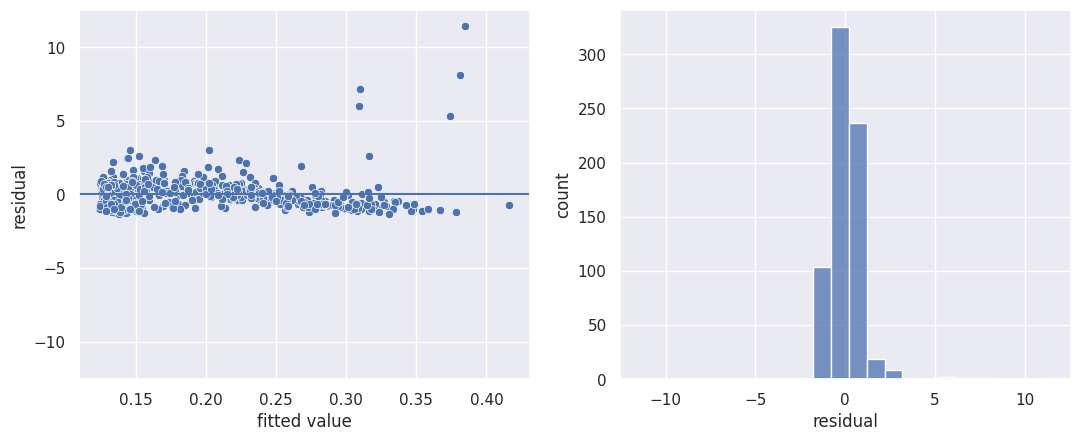

In [6]:
result.plot_residuals()

### Modelo B

In [7]:
result = reg.linear(data=metrics, formula='Volatility ~ betweenness + np.abs(Return)')

result.micro_summary()

variable,coefficient,std error,p-value
betweenness,-1.977090,7.707860,0.797638
np.abs(Return),0.260333,0.015929,0.000000


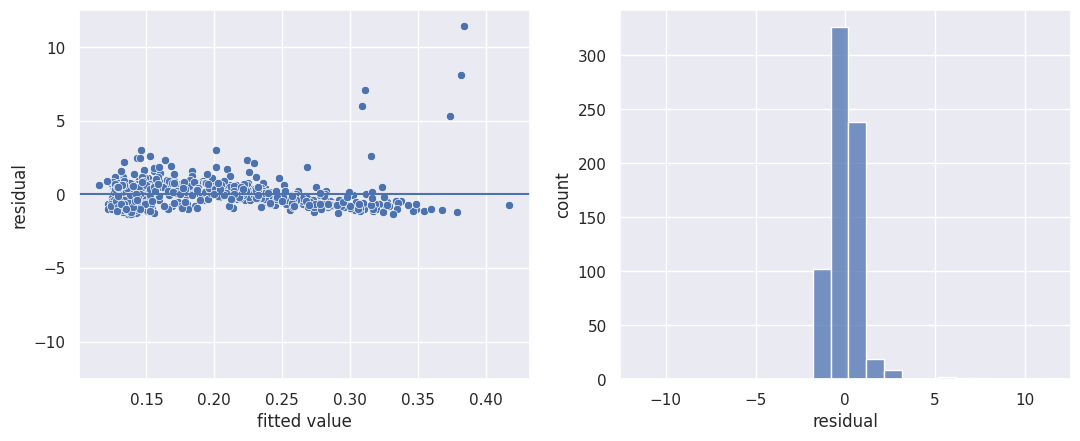

In [8]:
result.plot_residuals()

### Modelo C

In [9]:
result = reg.linear(data=metrics, formula='Volatility ~ betweenness + np.abs(Return) + coreness')
result.micro_summary()

variable,coefficient,std error,p-value
betweenness,-1.964919,7.717293,0.799098
np.abs(Return),0.260452,0.016120,0.000000
coreness,0.000616,0.012418,0.960465


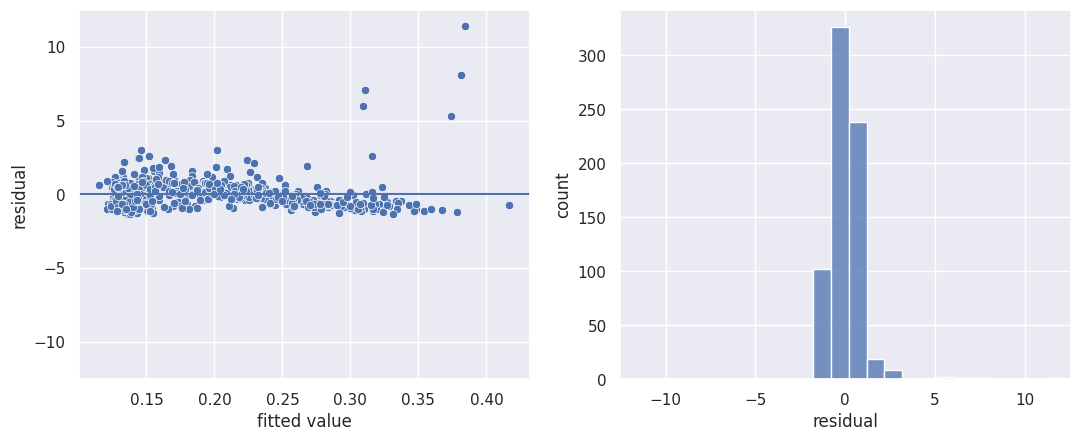

In [10]:
result.plot_residuals()

### Modelo D

In [11]:
result = reg.linear(data=metrics, formula='Return ~ clustering')
result.micro_summary()

variable,coefficient,std error,p-value
clustering,0.146082,0.086239,0.090728


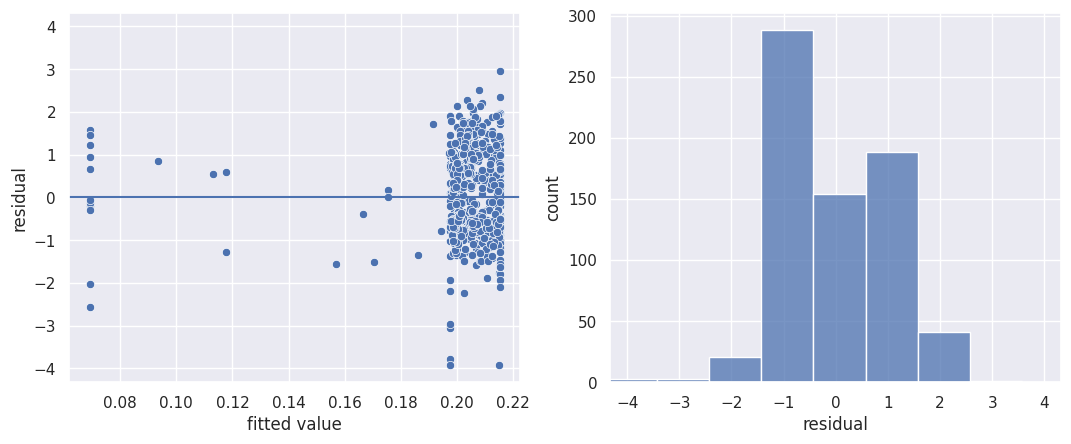

In [12]:
result.plot_residuals()

In [13]:
(result.fittedvalues > -0.170).value_counts()

True    699
dtype: int64

In [14]:
metrics[result.fittedvalues > -0.170].describe()

,Unnamed: 0,Return,Volatility,Sharpe,Volume,betweenness,coreness,clustering
count,699.000000,699.000000,699.000000,699.000000,6.990000e+02,699.000000,699.000000,699.000000
mean,349.000000,0.202776,0.195299,1.092052,9.304675e+05,0.000232,0.377222,0.914842
std,201.928205,0.306604,0.120763,1.816391,4.880443e+06,0.000505,0.317300,0.134389
min,0.000000,-0.999503,0.002420,-2.771551,1.162637e+04,0.000000,0.000000,0.000000
25%,174.500000,-0.009162,0.119663,-0.080082,3.003956e+04,0.000026,0.040563,0.895639
50%,349.000000,0.102284,0.207049,0.977557,8.353145e+04,0.000141,0.356151,0.926346
75%,523.500000,0.435059,0.244413,2.081476,4.101246e+05,0.000206,0.672239,0.976432
max,698.000000,1.123867,1.557547,22.467695,8.726091e+07,0.006927,1.000000,1.000000
